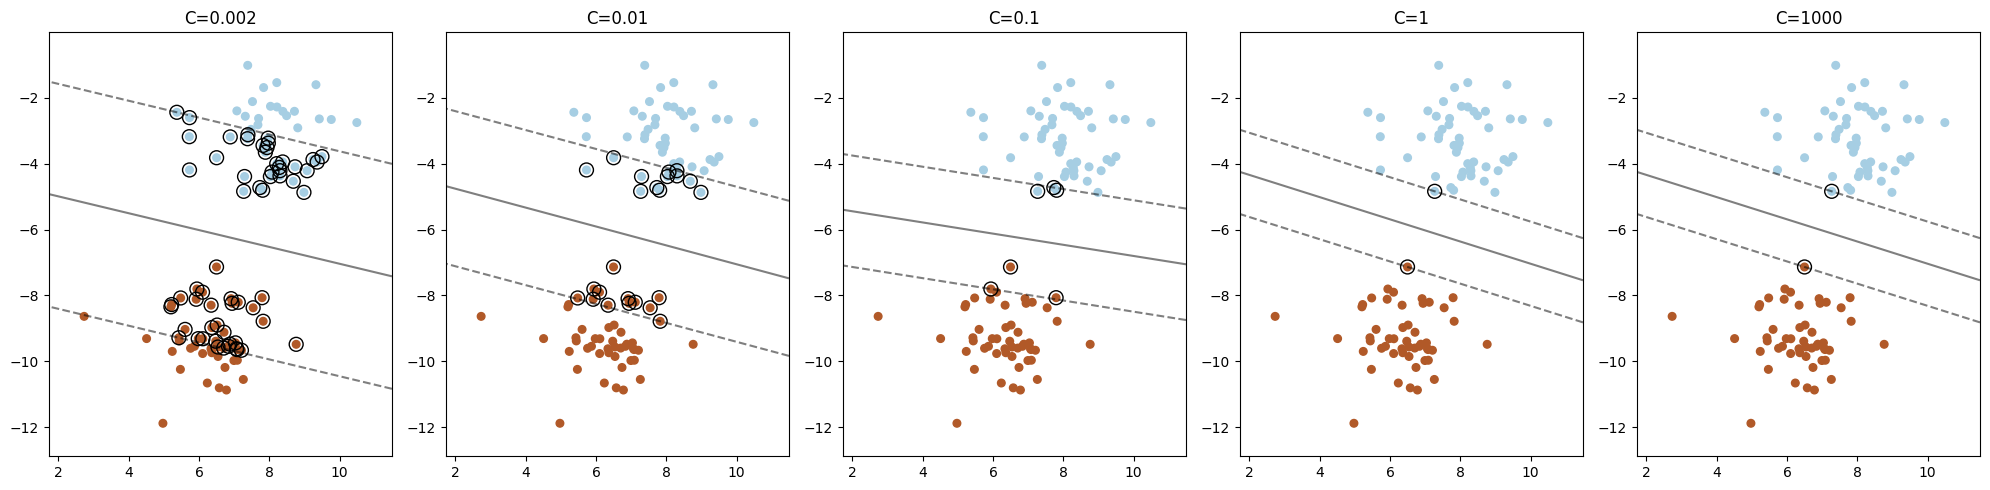

In [1]:
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

fig, ax = plt.subplots(1, 5, figsize=(20, 5))
ax = ax.flatten()

# we create some linearly separable points
X, y = make_blobs(n_samples=100, centers=2, random_state=6)

for index, C in enumerate([0.002, 0.01, 0.1, 1, 1000]):
    # fit the model, no regularization (high C)
    clf = svm.SVC(kernel="linear", C=C)
    clf.fit(X, y)

    ax[index].scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
        ax=ax[index],
    )
    # plot support vectors
    ax[index].scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )

    ax[index].set_title(f"C={C}")

fig.tight_layout()
plt.show()